In [9]:
import os
import sys

libs_dir = os.path.join("/".join(os.getcwd().split("/")[:-2]))
sys.path.append(libs_dir)

import numpy as np
import matplotlib.pyplot as plt
from libs.figure_config import *
import matplotlib.patches as patches
from libs.satellite import *

In [10]:
satellite_1293 = LEOsatellite(
    libs_dir + '/data/STARLINK_1293.txt')
location = np.loadtxt(
    libs_dir + '/data/ogs_loc.txt')
year = 2021
day = 357
hour = 16
minute = 29
t = np.arange(0, 241, 10)
second = 53 + t
utc = 9
latitude = location[:, 0]
longitude = location[:, 1]
elevation = location[:, 2]

slant_path_lst = np.zeros(len(second))
zenith_angle_lst = np.zeros(len(second))
for idx in range(len(second)):
    slant_path_lst[idx], zenith_angle_lst[idx] = satellite_1293.computeGeometricWithUser(
        year, day, hour, minute, second[idx], utc,
        longitude[idx], latitude[idx], elevation[idx]
    )

slant_path_lst = slant_path_lst * 1000

In [11]:
qber_simul = np.load('results/qber_simul_bbm92_test1.npy')
skr_simul = np.load('results/skr_simul.npy')

qber_analysis = np.load('results/qber_analysis_bbm92_test1.npy')
skr_analysis = np.load('results/skr_analysis.npy')

ValueError: x and y must have same first dimension, but have shapes (25,) and (49,)

findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times Ne

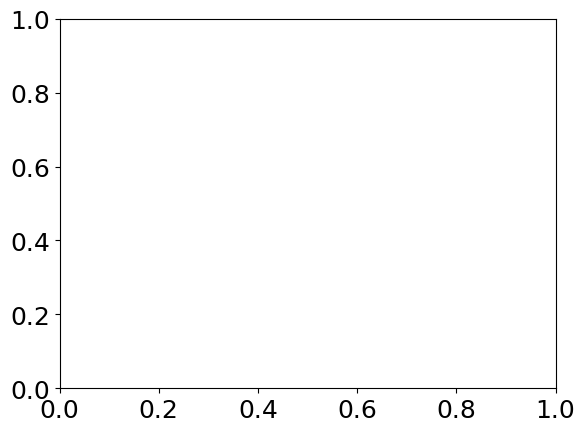

In [12]:
plt.plot(t, qber_analysis[0][:]*100)
plt.plot(t, qber_analysis[1][:]*100, ls='--')

plt.scatter(t, qber_simul[1][:]*100, marker='o', c='red', s=30, linewidths=1, zorder=2)
plt.scatter(t, qber_simul[2][:]*100, marker='o', c='red', s=30, linewidths=1, zorder=2)

plt.xlabel(r'Satellite Pass Duration (second)')
plt.ylabel(r"QBER (%)")

plt.xlim(0, 240)

plt.grid()
plt.tight_layout()
_ = plt.xticks(np.arange(0, 241, 30))

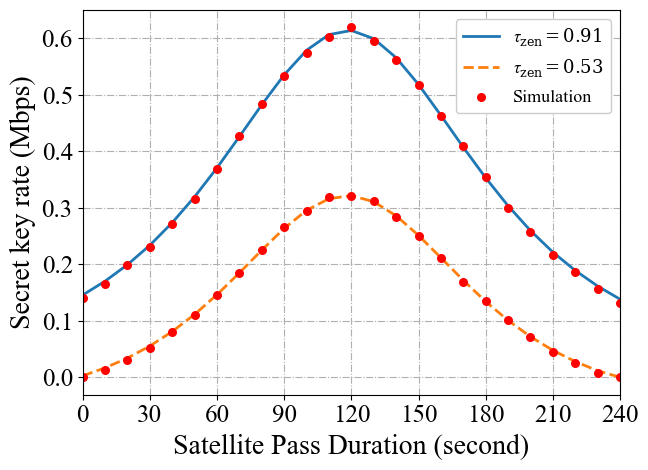

In [25]:
plt.plot(t, skr_analysis[0][:]/10**6, label=r'$\tau_{\rm zen} = 0.91$')
plt.plot(t, skr_analysis[1][:]/10**6, ls='--', label=r'$\tau_{\rm zen} = 0.53$')

plt.scatter(t, skr_simul[0][:]/10**6, marker='o', c='red', s=30, linewidths=1, zorder=2, label='Simulation')
plt.scatter(t, skr_simul[1][:]/10**6, marker='o', c='red', s=30, linewidths=1, zorder=2)

plt.xlabel(r'Satellite Pass Duration (second)')
plt.ylabel(r"Secret key rate (Mbps)")

plt.xlim(0, 240)

plt.legend()

plt.grid()
plt.tight_layout()
_ = plt.xticks(np.arange(0, 241, 30))
plt.savefig(f'skr_sat_pass.pdf', format='pdf', bbox_inches="tight")